In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn as nn
import cv2
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
import ast

def showImgBBox(img,label):
    plt.imshow(img)
    plt.axis('off')
    x1,y1,x2,y2,x3,y3,x4,y4 = label
    pt1_x= [x1,x2]
    pt1_y= [y1,y2]
    pt2_x= [x2,x3]
    pt2_y = [y2,y3]
    pt3_x = [x3,x4]
    pt3_y = [y3,y4]
    pt4_x = [x4,x1]
    pt4_y = [y4,y1]
    plt.plot(pt1_x,pt1_y,color='white')
    plt.plot(pt2_x,pt2_y,color='white')
    plt.plot(pt3_x,pt3_y,color='white')
    plt.plot(pt4_x,pt4_y,color='white')
    plt.show()


def show(img, cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()
    

df = pd.read_csv('./train_labels.csv', converters={1:ast.literal_eval})
df.head(5) 



Y = df['points'].values
for i in range(len(Y)):
    Y[i][0]/=1280
    Y[i][2]/=1280
    Y[i][4]/=1280
    Y[i][6]/=1280
    Y[i][1]/=720
    Y[i][3]/=720
    Y[i][5]/=720
    Y[i][7]/=720
    
Y = Y.tolist()
Y = np.array(Y) 



directory = './images/'

X = []

def dataloader(pair):
    impath = pair[0]
    img = cv2.imread(directory + impath)  
    img= cv2.resize(img, (227,128), cv2.INTER_LINEAR_EXACT)
    img = cv2.Canny(img,10,100)
    img/=img.max().astype(float)
    X.append(img)
    

numdf=df.to_numpy()


NUM_SAMPLES = 500

for pair in numdf[:NUM_SAMPLES]:
    dataloader(pair)
    
X = np.array(X)

      
      
Y = Y[:NUM_SAMPLES] 


X = np.array(X)
Y = np.array(Y) 


cnn = models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(5,5), input_shape=(128,227,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,activation='relu',kernel_size=(5,5)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3)),
    layers.AveragePooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(8,activation='relu')
])    


cnn.compile(optimizer='adam',loss = tf.keras.losses.Huber(delta=0.2),metrics=['accuracy'] )


cnn.fit(X,Y,epochs=150)

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

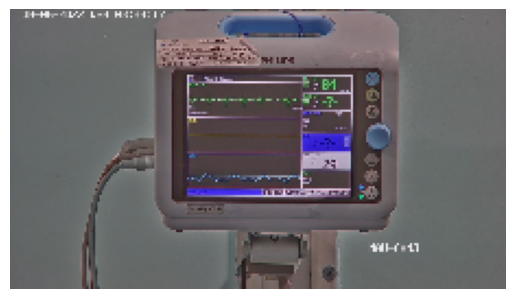

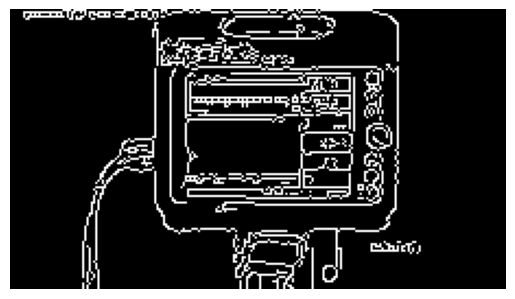

In [ ]:
im = X[0]
show(im)
show(cv2.Canny(im,20,240))

In [ ]:
print(df.head(5))

                                          image_name  \
0      medicakolkata_mau_mon--2_2022_6_8_6_8_51.jpeg   
1  kamalnayanbajaj_micu_mon--22_2022_6_20_17_47_2...   
2  kamalnayanbajaj_micu_mon--15_2022_6_20_22_46_2...   
3   medicakolkata_ccu2_mon--3_2022_5_30_12_6_19.jpeg   
4     medicakolkata_ccu2_mon--5_2022_6_8_6_6_37.jpeg   

                                              points  
0  [0.358984375, 0.23541666666666666, 0.692265605...  
1  [0.32999999999999996, 0.21944444444444444, 0.7...  
2  [0.38859374999999996, 0.25680555555555556, 0.6...  
3  [0.27640624046325685, 0.15652777353922526, 0.5...  
4  [0.192890625, 0.21569444444444447, 0.591093730...  
